## Vehicle Insurance Claim Fraud Detection - exploratory data analysis

In [18]:
# import all necessary libraries
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.stats as stats

In [2]:
df = pd.read_csv("../Dataset/fraud_oracle.csv")
df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [3]:
print(f'Number of observations: {len(df)}')
print(f'Number of attributes: {len(df.columns)}')
print(f'Attributes\' data types: ', *df.dtypes.unique())

Number of observations: 15420
Number of attributes: 33
Attributes' data types:  object int64


In [4]:
# new order, more comprehensible
new_order = [
 'PolicyNumber',
 'DayOfWeek',
 'WeekOfMonth',
 'Month',
 'Year',
 'DayOfWeekClaimed',
 'MonthClaimed',
 'WeekOfMonthClaimed',
 'AccidentArea',
 'NumberOfCars',
 'Fault',
 'PoliceReportFiled',
 'WitnessPresent',
 'Sex',
 'Age',
 'AgeOfPolicyHolder',
 'MaritalStatus',
 'DriverRating',
 'Make',
 'VehicleCategory',
 'VehiclePrice',
 'AgeOfVehicle',
 'BasePolicy',
 'PolicyType',
 'RepNumber',
 'AgentType',
 'Deductible',
 'Days_Policy_Accident',
 'Days_Policy_Claim',
 'NumberOfSuppliments',
 'AddressChange_Claim',
 'PastNumberOfClaims',
 'FraudFound_P'
]
assert(set(df.columns).difference(new_order)==set())
df = df[new_order]

In [5]:
# analyze the values of 
# for attr in list(df.columns):
#     print(f'{attr}: {df[attr].unique()}')

In [6]:
df.head()
# df.to_csv('../Dataset/preprocessed_data/fraud_oracle_reordered.csv')

,PolicyNumber,DayOfWeek,WeekOfMonth,Month,Year,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,AccidentArea,NumberOfCars,...,PolicyType,RepNumber,AgentType,Deductible,Days_Policy_Accident,Days_Policy_Claim,NumberOfSuppliments,AddressChange_Claim,PastNumberOfClaims,FraudFound_P
0,1,Wednesday,5,Dec,1994,Tuesday,Jan,1,Urban,3 to 4,...,Sport - Liability,12,External,300,more than 30,more than 30,none,1 year,none,0
1,2,Wednesday,3,Jan,1994,Monday,Jan,4,Urban,1 vehicle,...,Sport - Collision,15,External,400,more than 30,more than 30,none,no change,none,0
2,3,Friday,5,Oct,1994,Thursday,Nov,2,Urban,1 vehicle,...,Sport - Collision,7,External,400,more than 30,more than 30,none,no change,1,0
3,4,Saturday,2,Jun,1994,Friday,Jul,1,Rural,1 vehicle,...,Sedan - Liability,4,External,400,more than 30,more than 30,more than 5,no change,1,0
4,5,Monday,5,Jan,1994,Tuesday,Feb,2,Urban,1 vehicle,...,Sport - Collision,3,External,400,more than 30,more than 30,none,no change,none,0


In [7]:
# from pandas_profiling import ProfileReport

# data_profile = ProfileReport(df=df, title="Vehicle Insurance Claim Fraud Detection", explorative=True)
# data_profile

## Histograms/Barplots

In [8]:
def compare_occurrences(df, attr):
    detected=df.groupby(attr).agg({'FraudFound_P':'sum'}).reset_index()
    total=df.groupby(attr).agg('count').reset_index()

    fig, (ax1,ax2) = plt.subplots(2,1,figsize=(20, 6))
    
    sns.barplot(x=attr, y='FraudFound_P', data = detected, ax=ax1).set_title("Fraud Detected")
    sns.barplot(x=attr, y='FraudFound_P', data = total, ax=ax2).set_title("Total")

    plt.show()

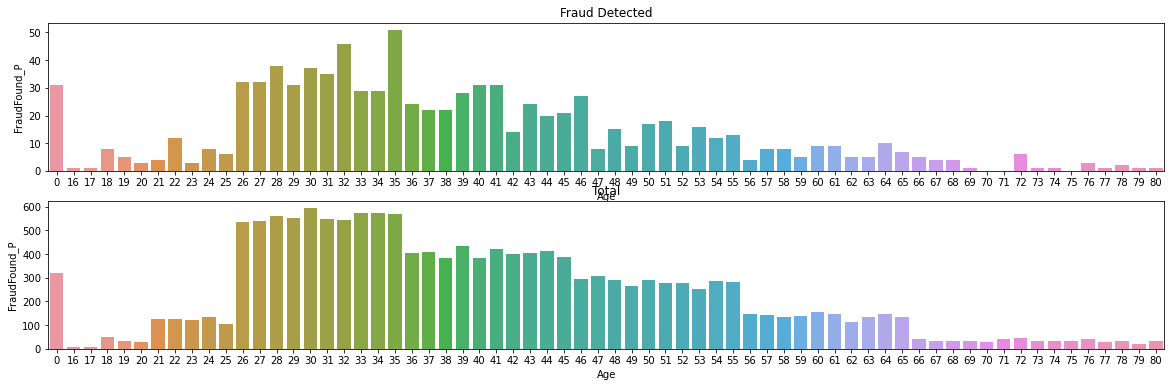

In [9]:
compare_occurrences(df, 'Age')

In [12]:
def create_histogram(df, attr, color='green'):
    total=df.groupby(attr).agg('count').reset_index()
    fig, (ax1) = plt.subplots(1,1,figsize=(10, 5))
    sns.barplot(x=attr, y='PolicyNumber', data = total, ax=ax1, color=color).set_title(attr)
    plt.show()

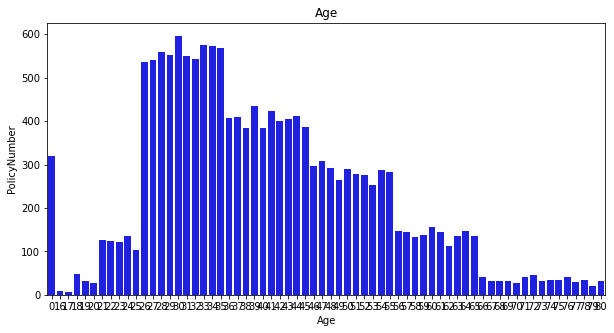

In [13]:
create_histogram(df, 'Age', 'blue')
# create_histogram(df, 'AgeOfPolicyHolder', 'green')

## Chi-squared test

In [15]:
# chi-squared test
def get_chi_squared(X, Y) -> list():
    result = list()
    for attr in X.columns:
        chi2, p, dof, ex = stats.chi2_contingency(pd.crosstab(X[attr], Y))
        result.append([attr,chi2,p])

    ch_df = pd.DataFrame(result, columns=['Attribute', 'chi_sq', 'p-val'])
    ch_df.sort_values(by=['p-val'], inplace=True)

    return(ch_df)

In [16]:
# X, Y -> explanatory/resopnse variable split
X = df.drop('FraudFound_P',axis=1).copy()
Y = df['FraudFound_P'].copy()

In [20]:
# add to data analysis
chi = get_chi_squared(X, Y)
chi

,Attribute,chi_sq,p-val
23,PolicyType,437.401870,1.848256e-89
22,BasePolicy,402.851921,3.325192e-88
19,VehicleCategory,290.942140,6.648398e-64
10,Fault,264.953824,1.428036e-59
30,AddressChange_Claim,104.733773,9.652105e-22
26,Deductible,72.415180,1.297108e-15
20,VehiclePrice,67.768295,2.983598e-13
31,PastNumberOfClaims,53.500831,1.433718e-11
18,Make,59.809999,2.195889e-06
6,MonthClaimed,42.266750,3.003256e-05
